In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
country_df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Country-data.csv")

In [4]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_df.shape

(167, 10)

In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
country_df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [29]:
x=country_df.iloc[:,1:]
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<AxesSubplot:>

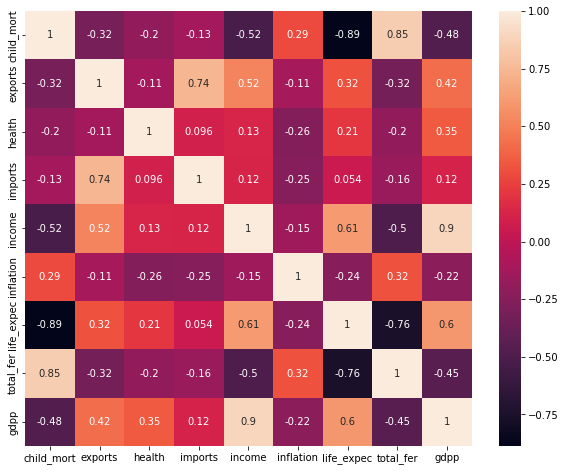

In [7]:
corr_matrix = country_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True)

In [ ]:
#child mortality and life expectancy shows high negative correlation
#total_fer and life_expectancy also shows high negative correlation
#gdpp and income shows high positive correlation
#total fertility and child mortality shows high positive correlation
#gdpp and life expectancy also shows high positive correlation


Countries with life expectancy less than 55 years of age

In [23]:
country_df['country'].loc[country_df['life_expec'] < 55]

31     Central African Republic
66                        Haiti
87                      Lesotho
94                       Malawi
106                  Mozambique
137                South Africa
166                      Zambia
Name: country, dtype: object

In [89]:
# Scaling the features

In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [31]:
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1503.0000000000002
1050.2145582853304
831.4244352086873
700.3229986404375
620.1633712888422
571.9992966496744
495.323382595192
455.2768276046999
426.4584456471473
396.25069895342995


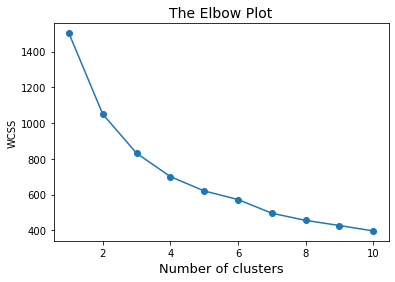

In [32]:
plt.plot(range(1, 11), wcss,marker='o')
plt.title('The Elbow Plot', fontsize=14)
plt.xlabel('Number of clusters', fontsize=13)
plt.ylabel('WCSS')
plt.show()

In [ ]:
#from the elbow method it is inferred that there is optimum 4 nos. of clusters 

In [33]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(x)
y_kmeans = kmeans.fit_predict(x)

In [18]:
print(y_kmeans)

[1 0 0 1 0 0 0 2 2 0 0 0 0 0 0 2 0 1 0 0 0 1 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 0 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 1 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


In [34]:
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=4)
    model.fit(x)
    inertia.append(model.inertia_)
    type(x)  

In [36]:
pd.value_counts(model.labels_)

1    87
0    47
3    30
2     3
dtype: int64

# Hierarchical Clustering Method:

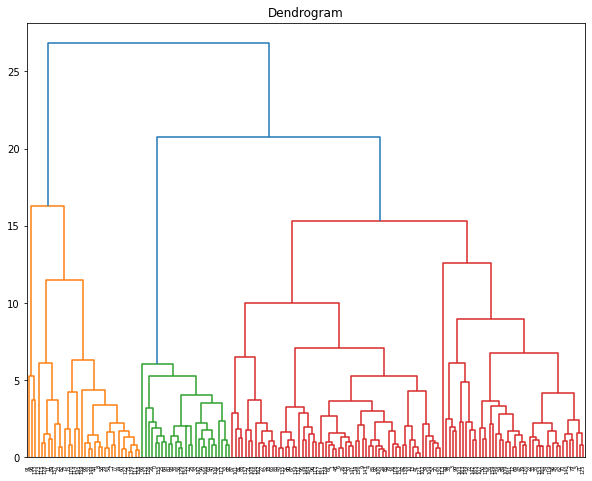

In [38]:
#Dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(x, method='ward')

plt.figure(figsize=(10,8))
plt.title('Dendrogram')

dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts='True')

plt.show()

In [ ]:
From this graph obtained through Heirachical clustering it could be assumed that there is 4 clusters

In [22]:
cluster1 = len(np.where(y_kmeans==0.)[0])
cluster2 = len(np.where(y_kmeans==1.)[0])
cluster3 = len(np.where(y_kmeans==2.)[0])
cluster4 = len(np.where(y_kmeans==3.)[0])
print('number of countries in cluster1 is :',cluster1)
print('number of countries in cluster2 is :',cluster2)
print('number of countries in cluster3 is :',cluster3)
print('number of countries in cluster4 is :',cluster4)

number of countries in cluster1 is : 87
number of countries in cluster2 is : 47
number of countries in cluster3 is : 30
number of countries in cluster4 is : 3


In [29]:
unique, counts = np.unique(y_kmeans, return_counts=True)
dict(zip(unique, counts))

{0: 87, 1: 47, 2: 30, 3: 3}

In [ ]:
#Cluster1 has 87 countries, cluster2 has 45 countires,cluster3 has 32 countires and cluster4 has 3 countires 

In [ ]:
#Adding clusters as a new feature in the dataset

In [34]:
country_df['cluster'] = y_kmeans
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [35]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,0.694611
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,0.826610
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,0.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,0.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,0.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,1.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,3.000000


In [37]:
country_df[['country', 'cluster']].loc[country_df['child_mort'] > 80]

,country,cluster
0,Afghanistan,1
3,Angola,1
17,Benin,1
25,Burkina Faso,1
26,Burundi,1
28,Cameroon,1
31,Central African Republic,1
32,Chad,1
36,Comoros,1
37,"Congo, Dem. Rep.",1


In [38]:
country_df[['country', 'cluster']].loc[country_df['life_expec'] < 55]

,country,cluster
31,Central African Republic,1
66,Haiti,1
87,Lesotho,1
94,Malawi,1
106,Mozambique,1
137,South Africa,1
166,Zambia,1


In [41]:
country_df[['country', 'cluster']].loc[country_df['income'] < 1500]

,country,cluster
25,Burkina Faso,1
26,Burundi,1
31,Central African Republic,1
36,Comoros,1
37,"Congo, Dem. Rep.",1
50,Eritrea,1
63,Guinea,1
64,Guinea-Bissau,1
88,Liberia,1
93,Madagascar,1


In [43]:
country_df[['country', 'cluster', 'income']].loc[country_df['cluster'] == 3]

,country,cluster,income
91,Luxembourg,3,91700
98,Malta,3,28300
133,Singapore,3,72100


#insights:Countries with low socio-economic and health ratings are clustered in cluster1
Hence,Cluster 1 countries are are in the direst need of aid.


List of countries that require aid

In [44]:
print(country_df['country'].loc[country_df['cluster']==1].to_list())

['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
